# Лабораторная работа 2
### Вариант 25
### Хайкова Светлана

Задачи: 2.2.5, 2.10.4

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Задача 2.2.5 Найти указанный в варианте корень уравнения f(x)=0 с точностью ε = 10−6 , двумя способами.
а) Использовать метод бисекции. Предварительно определить отрезок локализации [a, b].

b) Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять середину отрезка локализации из п. а).
Сравнить число итераций в п. a), b).


#### $f(x) = sqrt(x) − cos(x)$
__________

/Users/strizh78/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


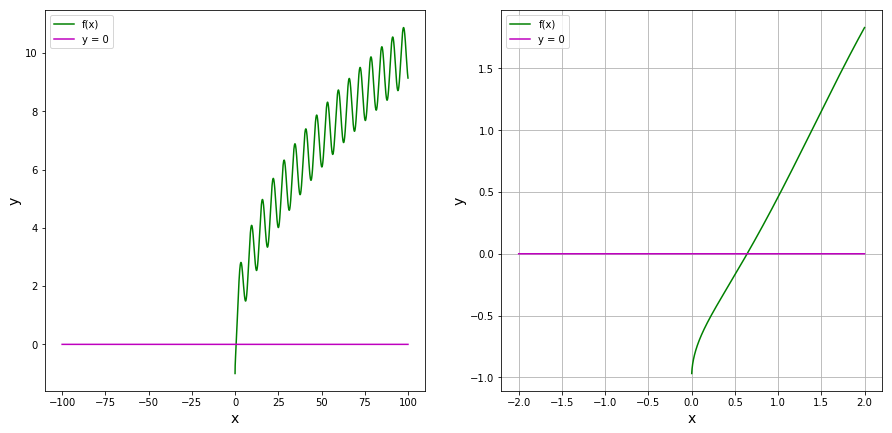

In [2]:
%matplotlib inline
# Посмотрим на функцию, чтобы выбрать отрезок локализации

fig, ax = plt.subplots(figsize = (15, 7), nrows = 1, ncols = 2)

for i in range(2):
    if i == 0:
        x = np.arange(-100, 100, 1e-3)
    else:
        x = np.arange(-2, 2, 1e-3)
    y = np.sqrt(x) - np.cos(x)
    
    ax[i].plot(x, y, c = 'g')
    ax[i].plot(x, x * 0, c = 'm')
    ax[i].legend(['f(x)', 'y = 0'])
    ax[i].set_xlabel('x', fontsize = 14)
    ax[i].set_ylabel('y', fontsize = 14)

plt.grid(True)
plt.show();

Видим, что корень лежит на отрезке [0, 1]

Значит этот отрезок и будет отрезком локализации бисекции

In [3]:
# задали границы отрезка локализации:
l = 0
r = 1

In [4]:
def f(x):
    ''' Возвращает значение функции f в точке x'''
    return math.sqrt(x) - math.cos(x)

def der_f(x):
    ''' Возвращает производную функции f в точке x'''
    return 1 / (2. * math.sqrt(x)) + math.sin(x)

### Бисекция

In [5]:
def BisectionSolve(f, l, r, eps):
    """ Принимает f(x), границы отрезка локализации и требуемую точность, 
    находит на отрезке корень уравнения f(x) = 0 методом бисекции,
    Возвращает 2 числа - найденный корень и понадобившееся число итераций """
    if f(l) * f(r) > 0:
        return np.NAN, 0
    
    steps = 0
    while l + eps < r:
        m = (l + r) / 2.
        if f(m) * f(r) < 0:
            l = m
        else:
            r = m
        steps += 1
    return l, steps

ans, st = BisectionSolve(f, l, r, 1e-5)
print 'Root = ', ans, '\nRequired number of steps = ', st

Root =  0.641708374023 
Required number of steps =  17


### Метод Ньютона 
За начальное приближение берем середину интервала локализации т е $(l + r) / 2$

In [6]:
def NewtonMethod(f, der_f, x0, eps):
    """ Принимает f(x), производную f(x), точку начального приближения и требуемую точность, 
    находит корень уравнения f(x) = 0 методом Ньютона,
    Возвращает 2 числа - найденный корень и понадобившееся число итераций """
    x = x0
    steps = 0
    while abs(f(x) / der_f(x)) > eps:
        steps += 1
        x = x - f(x) / der_f(x)
    return x, steps

ans, st = NewtonMethod (f, der_f, (l + r) / 2., 1e-5)
print 'Root = ', ans, '\nRequired number of steps = ', st

Root =  0.641714866792 
Required number of steps =  2


## Задача 2.10.4
Функция $y = f(x)$ задана неявно уравнением $F(x, y) = 0$.

1. На отрезке [1, 5] построить таблицу значений функции $y = f(x)$ с шагом h=0.5, применяя один из методов численного решения нелинейного уравнения (с точностью ε = 10−7 ). 

2. Построить график функции $y = f(x)$ на заданном отрезке.

#### $F(x, y) = e^{(x * y)} − cos(x * \sqrt[3]y)$ ,  4.5 ≤ x ≤ 7.2, −1.2 ≤ y ≤ −0.2
___________________________________________________________________________

Посмотрим как выглядит функция при разных фиксированных значениях x в нашем диапазноне ([1, 5] с шагом 0.5):

/Users/strizh78/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2536: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta


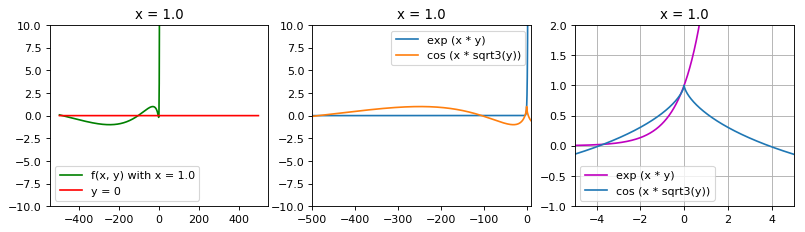

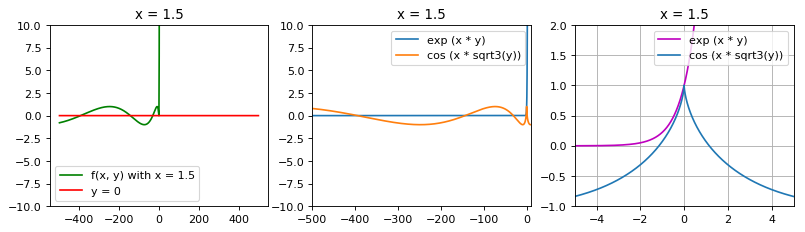

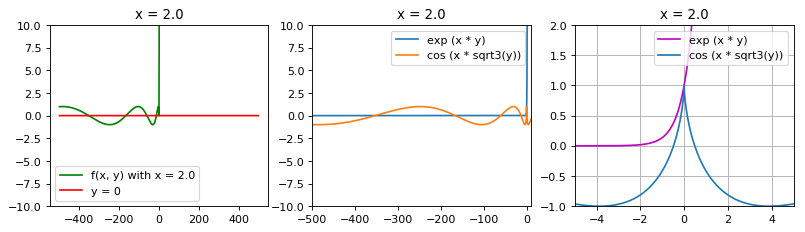

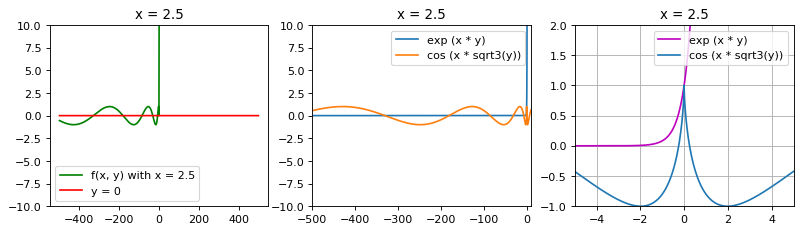

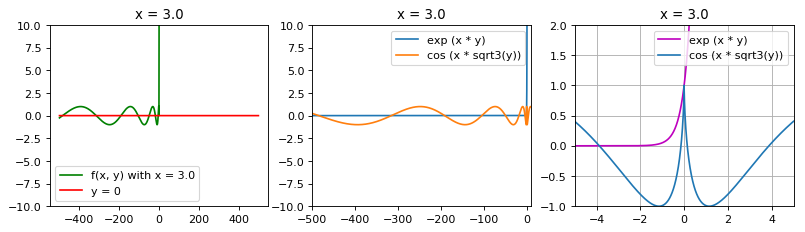

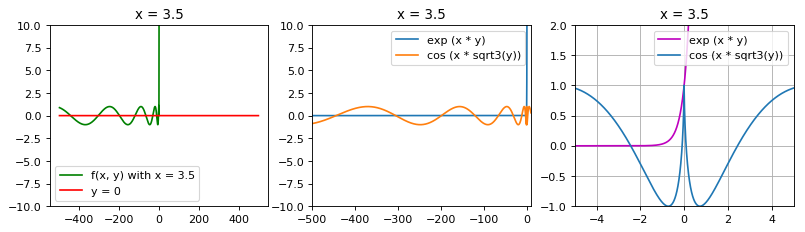

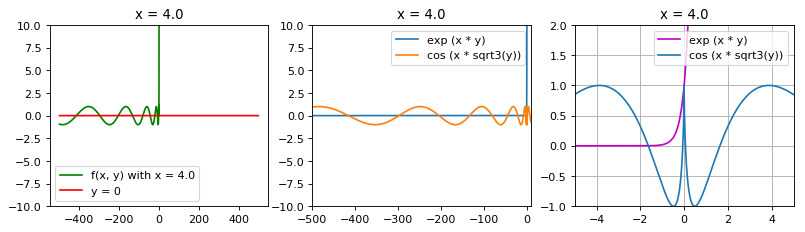

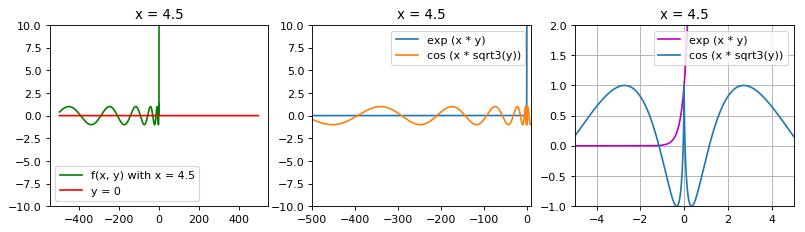

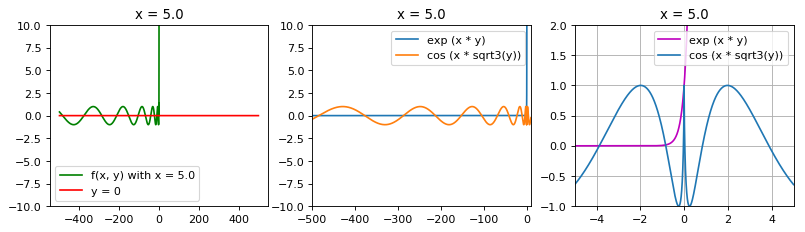

In [7]:
%matplotlib inline
for x in np.arange (1, 5.5, 0.5):
    fig, ax = plt.subplots(figsize = (12, 3), dpi = 80, nrows = 1, ncols = 3)
    y = np.arange(-500, 500, 0.001)
    
    # строим саму функцию и прямую = 0
    ax[0].plot (y, np.exp(x * y) - np.cos(x * np.sign(y) * (y * np.sign(y))**(1 / 3.)), c = 'g')
    ax[0].plot (y, y * 0, c = 'r')
    ax[0].set_ylim(-10, 10)
    ax[0].set_title('x = ' + str(x))
    ax[0].legend(['f(x, y) with x = ' + str(x), 'y = 0'])
    
    # геометрическое решение - пересечение экспоненты и косинуса
    ax[1].plot (y, np.exp(x * y))
    ax[1].plot (y, np.cos(x * np.sign(y) * (y * np.sign(y))**(1 / 3.)))
    ax[1].set_ylim(-10, 10)
    ax[1].set_xlim(-500, 10)
    ax[1].legend(['exp (x * y)', 'cos (x * sqrt3(y))'])
    ax[1].set_title('x = ' + str(x))
    
    # строим предыдущий график более приближенно
    ax[2].plot (y, np.exp(x * y), c = 'm')
    ax[2].plot (y, np.cos(x * np.sign(y) * (y * np.sign(y))**(1 / 3.)))
    ax[2].set_ylim(-1, 2)
    ax[2].set_xlim(-5, 5)
    ax[2].legend(['exp (x * y)', 'cos (x * sqrt3(y))'])
    ax[2].set_title('x = ' + str(x))
    plt.grid(True)
plt.show()

Видим, что так то у нас $\infty$ корней {в том числе точка (0, 0)}, но мы будем искать только наименьший по модулю корень, не равный 0
________

Создаем функцию для нахождения корней уравнения $F(x, y) = 0$, где первая переменная фиксирована и ищется значение 2й, методом бисекции:

In [8]:
def f(x, y):
    ''' Возвращает значение функции f в точке (x, y)'''
    return np.exp(x * y) - np.cos(x * np.sign(y) * (np.sign(y) * y)**(1 / 3.))

def BisectionSolveFor2VarFunc(f, x, l, r, eps):
    """ Принимает f(x, y), значение x, границы отрезка локализации и требуемую точность, 
    находит на отрезке корень уравнения f(x, y) = 0 методом бисекции (для фиксированного x находим решение для y),
    Возвращает найденный корень"""
    if f(x, l) * f(x, r) > 0:
        return np.NAN
    while l + eps < r:
        m = (l + r) / 2.
        if f(x, m) * f(x, r) < 0:
            l = m
        else:
            r = m
    return l

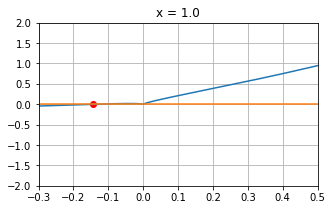

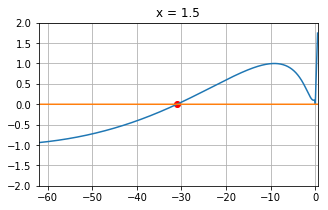

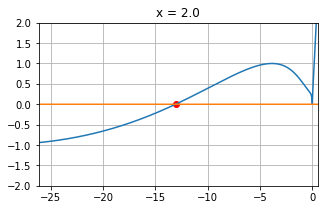

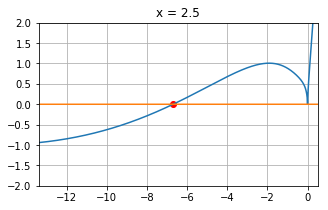

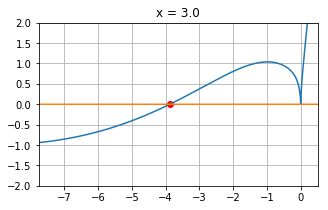

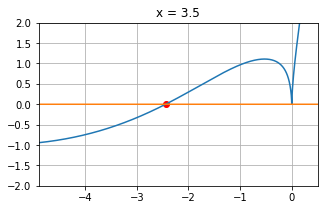

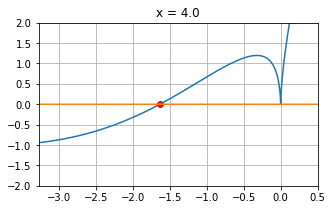

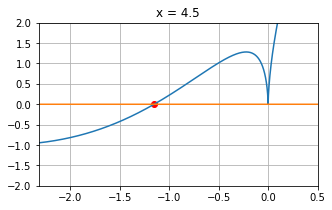

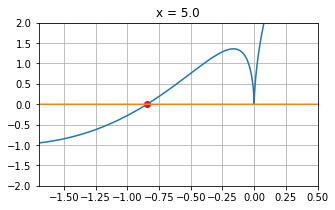

In [26]:
%matplotlib inline

table = {} # здесь будем хранить нашу таблицу (сопоставляем значению x значение y)
for x in np.arange(1, 5.5, 0.5):
    fig, ax = plt.subplots(figsize = (5, 3))
    
    # находим интервал в котором запустим бисекцию
    l = -1e-15 # возьмем левое значение отрезка близким к 0, чтобы не пропустить корень, но не 0, так как 0 корень сам по себе
    r = l
    while f(x, r) >= 0:
        r -= 0.01
    
    y = BisectionSolveFor2VarFunc(f, x, r, l, 1e-7)  # нашли значение y 
    table[x] = y
    
    # строим график, чтобы посмотреть, что все ок
    ax.scatter(y, f(x, y), c = 'r')
    y_var = np.arange(-100, 100, 0.001)
    ax.plot (y_var, np.exp(x * y_var) - np.cos(x * np.sign(y_var) * (y_var * np.sign(y_var))**(1 / 3.)))
    ax.plot (y_var, y_var * 0)
    plt.title('x = ' + str(x))
    plt.ylim(-2, 2)
    plt.xlim(2 * r, 0.5)
    plt.grid(True)
plt.show()

In [27]:
'''Выводим таблицу значений функции y = f(x) в точках из отрезка [1, 5] с шагом 0.5'''
print 'x\ty'
for i in table:
    print i, '\t', table[i]

x	y
1.5 	-31.0062766923
1.0 	-0.1445302248
2.0 	-13.0807730615
3.0 	-3.87580662668
4.0 	-1.6365912056
5.0 	-0.844989132881
2.5 	-6.69735599607
4.5 	-1.15247485876
3.5 	-2.4410300225


Теперь построим график функции, для этого пройдем по интервалу $x$ и для каждого найдем значение $y$ способом, которым строили таблицу значений выше

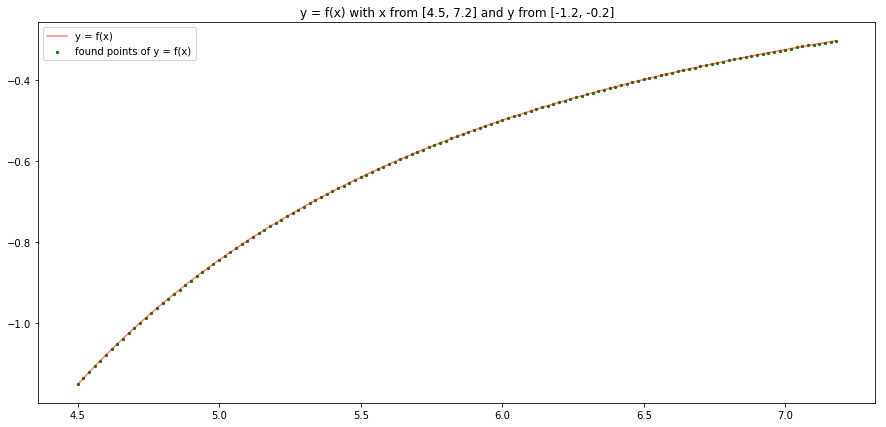

In [29]:
X = np.arange(4.5, 7.2, 2e-2)
f_x = []
for x in X:
    l = -1e-15
    while f(x, r) >= 0:
        r -= 0.01
    f_x.append(BisectionSolveFor2VarFunc(f, x, r, l, 1e-7))  # нашли значение y = f(x) 

'''Строим график функции y = f(x) на заданном интервале по найденным значениям'''
plt.figure(figsize = (15, 7))
plt.plot(X, f_x, c = 'r', alpha = 0.5)
plt.scatter(X, f_x, s = 5, color = 'g')
plt.title('y = f(x) with x from [4.5, 7.2] and y from [-1.2, -0.2]')
plt.legend(['y = f(x)', 'found points of y = f(x)'])
plt.show()